### Training Single Layer Neural Networks model

- Iris dataset
- classify flowers (Iris setosa, Iris virginica and Iris versicolor)

In [14]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

Load the dataset

In [15]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

View the data

In [16]:
x[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

x - 2D array with features - heigh, width  
y - 1D - the labels - one of (Iris setosa, Iris virginica and Iris versicolor)


Visualize the dataset

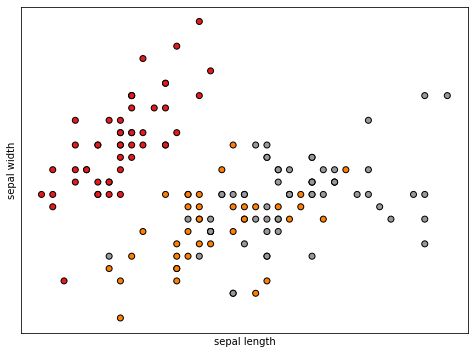

In [17]:
# plot graph
plt.figure(2, figsize=(8, 6))
plt.clf()

# create scatter graph
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')

# axis labels
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.xticks(())
plt.yticks(())

plt.show()

Split the dataset

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Scale features
- transform values within a dataset to the same scale to remove issues which may negatively affect the algorithm
- StandardScaler() function - Values are altered to have a zero mean and divided by the standard deviation, standardising unit variance (the distance between data points). This alters the scale of the dataset while retaining the ‘distance’ between values.

In [22]:
# scale features
sc = StandardScaler()
sc.fit(x_train)

# Apply the scaler to the split datasets
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

Train a Perceptron

- **max_iter** is set to a maximum of 50 iterations over the data set. Iterations are also referred to as “epochs”, “epoch” is often used in research papers.

- **eta0** is a constant value by which updates are multiplied. This will ensure the values change and don’t stagnate, it can be thought of as bias within the network. We will discuss bias later in this chapter.

- **verbose** is a boolean flag (0 or 1, off or on), when set to 1 it will print information for each epoch.

In [23]:
# create a perceptron - 50 epochs, learning rate - 0.3
ppn = Perceptron(max_iter=50, eta0=1, verbose=1)

# train the perceptron
ppn.fit(x_train_std, y_train)

-- Epoch 1
Norm: 1.67, NNZs: 4, Bias: -2.000000, T: 105, Avg. loss: 0.000625
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.83, NNZs: 4, Bias: -2.000000, T: 210, Avg. loss: 0.013631
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 5.31, NNZs: 4, Bias: -2.000000, T: 315, Avg. loss: 0.003603
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 4.74, NNZs: 4, Bias: -3.000000, T: 420, Avg. loss: 0.021645
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 4.74, NNZs: 4, Bias: -3.000000, T: 525, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.74, NNZs: 4, Bias: -3.000000, T: 630, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 6 epochs took 0.00 seconds
-- Epoch 1
Norm: 3.18, NNZs: 4, Bias: -2.000000, T: 105, Avg. loss: 0.801696
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.41, NNZs: 4, Bias: -4.000000, T: 210, Avg. loss: 0.828124
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 5.23, NNZs: 4, Bias: 0.000000, T: 315, Avg

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


Perceptron(eta0=1, max_iter=50, verbose=1)

In [26]:
Perceptron(
    alpha=0.0001,
    class_weight=None,
    eta0=1,
    fit_intercept=True,
    max_iter=50,
    # n_iter=None,
    n_jobs=1,
    penalty=None,
    random_state=0,
    shuffle=True,
    tol=None,
    verbose=0,
    warm_start=False
)

Perceptron(eta0=1, max_iter=50, n_jobs=1, tol=None)

Prediction
- **easy** - call predict() function to implement prediction
- **dificult**:
    - ensuring the dataset is clean and representative,
    - assumptions are sound 
    - system design is flawless

In [27]:
# Apply the trained perceptron on the x data to make predictions for test y data
y_pred = ppn.predict(x_test_std)

Results

In [28]:
# print predicted y test data
y_pred

array([1, 2, 0, 2, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 2, 1,
       1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 1, 2, 1, 0,
       0])

In [29]:
# print true y test data
y_test

array([1, 2, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 2, 2, 1, 2, 1,
       1, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 1, 2, 1, 0,
       0])

In [30]:
# print accuracy of the implementation
acc_score = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % acc_score)

Accuracy: 0.91
